# Scrapping top repository for github topics using python using Beautiful Soup


### Introduction about web scrapping

Web scraping, also called web data mining or web harvesting, Web scraping is the process of extract, parse, download and organize useful information from the web automatically.

Unlike screen scraping, which only copies pixels displayed on screen, web scraping extracts underlying HTML code and, with it, data stored in a database.


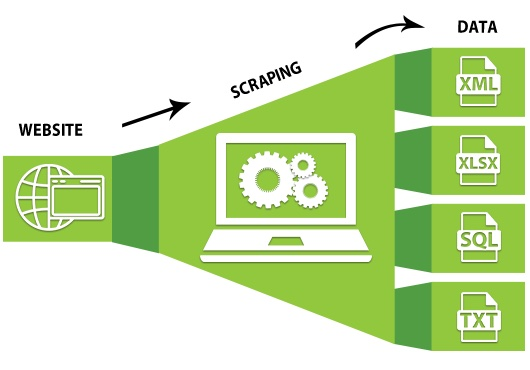

### Introduction about GitHub
GitHub, is a cloud based hosting service for software development projects that use the Git revision control system.GitHub is a social network for programmers.It is the world's largest coding community.Github allows you to take part in collaboration by forking projects, sending and pulling requests, and monitoring development.

GitHub offers both paid plans for private repositories, and free accounts for open source projects.

It offers the distributed version control and source code management (SCM) functionality of Git, plus its own features. It provides access control and several collaboration features such as bug tracking, feature requests, task management, continuous integration for every project.

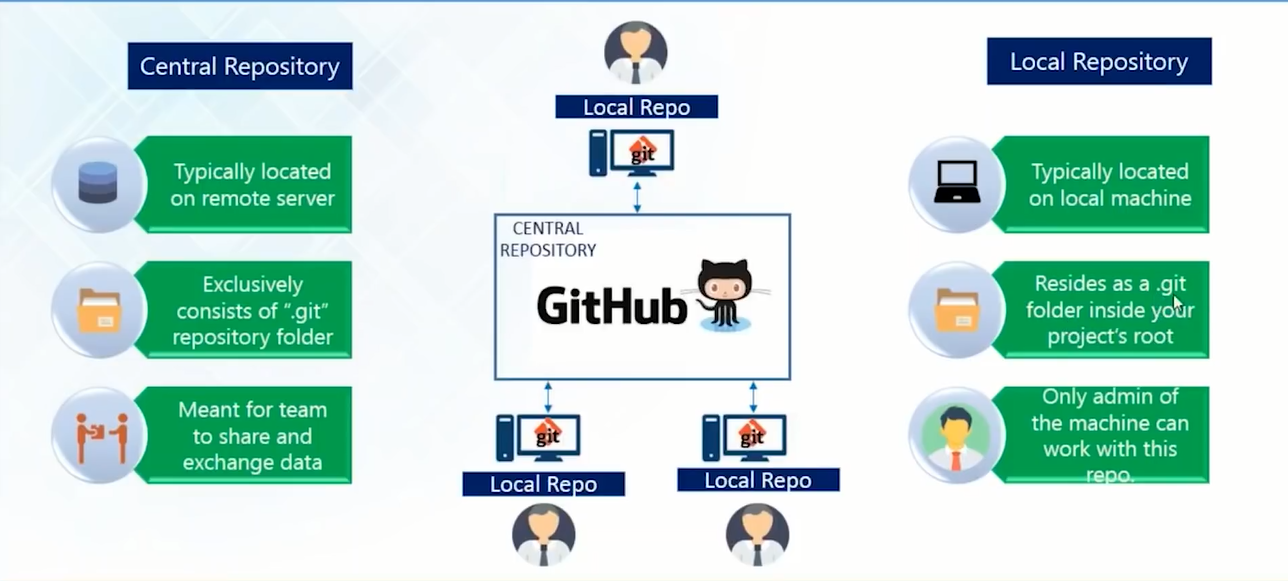

#### project outlines

- We're going to scarpe https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top 30 repository in the topic from the topic page
- For each repository, we'll grab the repo name, username, stars and repo URL
- For each topic we will create a CSV file in the following format:

Repo Name,Username,Stars,Repository URL
nfinite-scrroll,metafizzy,7100,https://github.com/metafizzy
Blog,ljianshu,7100,https://github.com/ljianshu
unfect,devlopit,5300,https://github.com/developit


## Tools used to scrape the list of topics from Github

- Requests : to download the page
- BS4 : to parse and extract information
- Converting to a Pandas DataFrame

## Requests

The requests allows you to send HTTP requests using Python.
The HTTP request returns a Response Object with all the response data (content, encoding, status, etc)

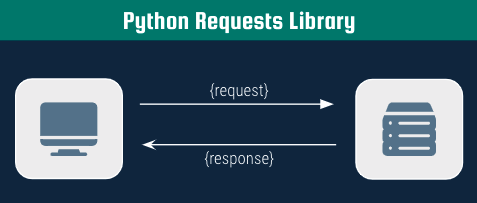

In [22]:
import requests

## Beautiful Soup : To parse and extract information
    
BeautifulSoup is a Python library for pulling data out of HTML and XML files.


Beautiful Soup a Python liberary is used here to get data from the GitHup Topics page which is designed using HTML. This python package is used to parse the HTML document that can be used to extract data from that particular page, this is essential for web scraping.

In [23]:
import requests
from bs4 import BeautifulSoup

def get_topics_page():
    
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [24]:
doc =get_topics_page()

In [25]:
type(doc)

bs4.BeautifulSoup

In [26]:
doc.find('a')

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

In [27]:
doc=get_topics_page()
#doc

### Get_topic_titles can be used to get the list of titles



In [28]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles               
                 

### Creating some helper functions to parse information from the page

To get topic titles, we can pick `p` tags with the `class`...

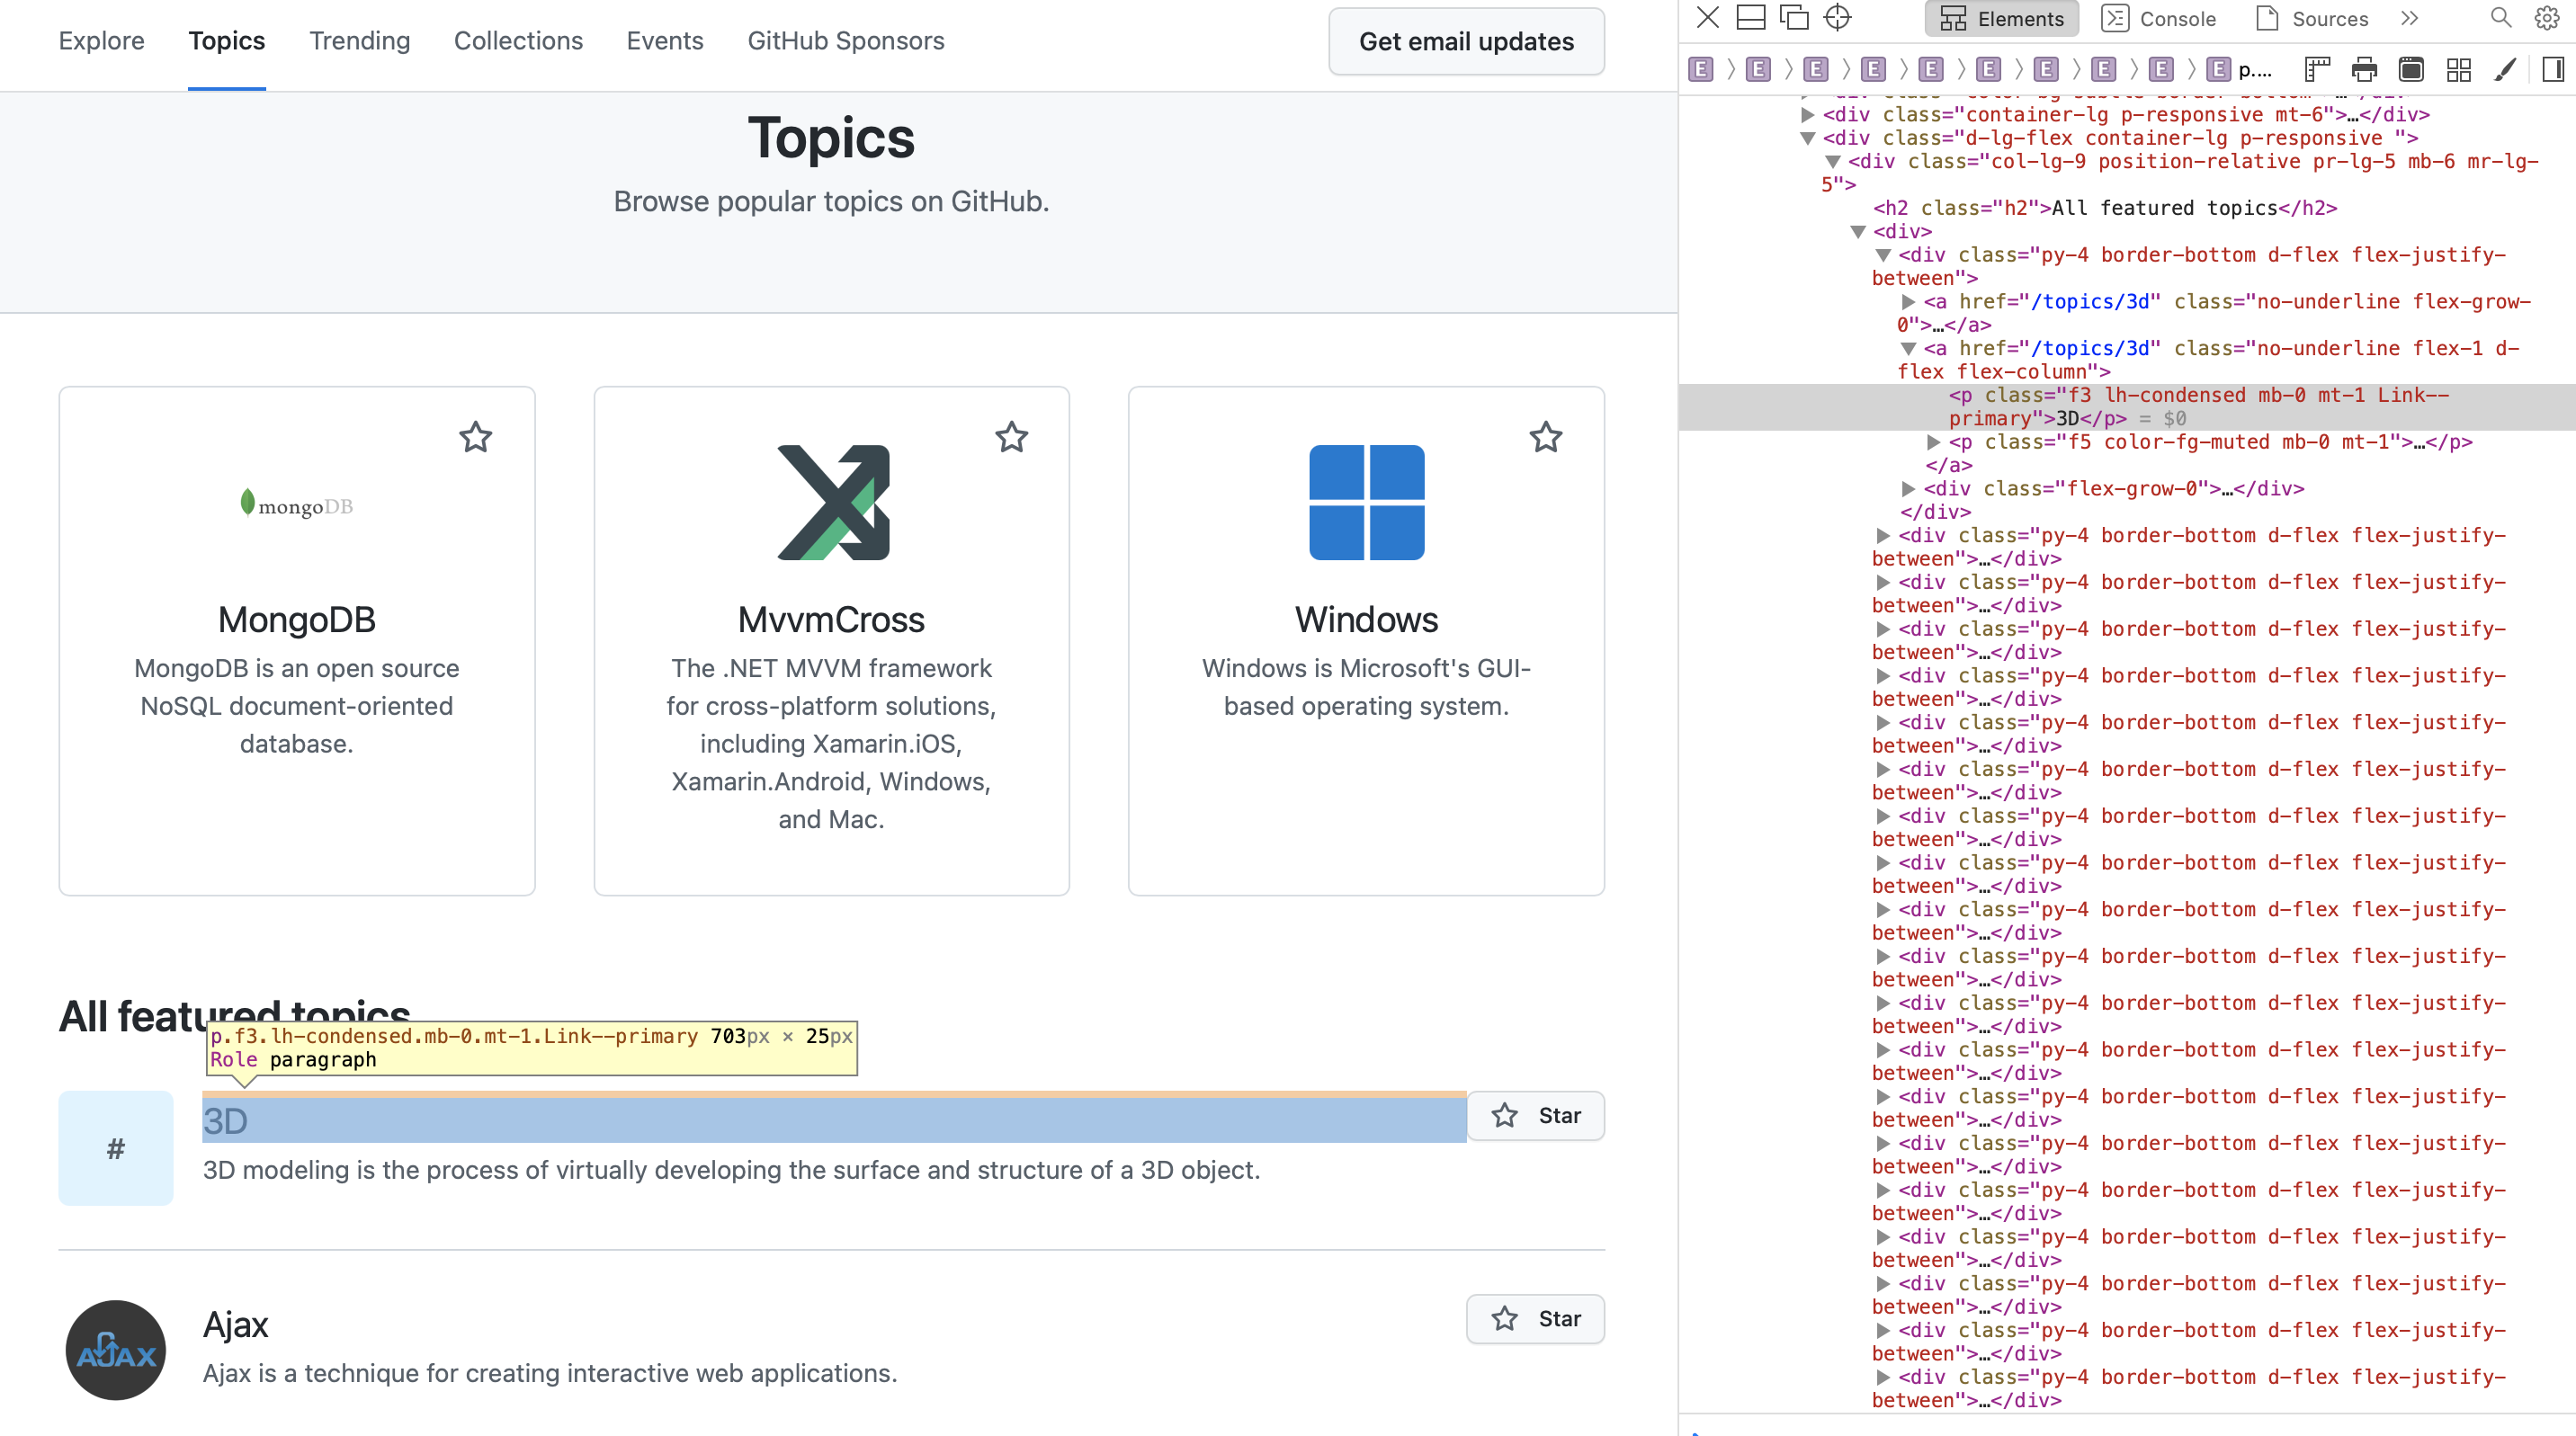

In [29]:
get_topic_titles(doc)[:9]

['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino']

###  Create  function ( get_topic_descriptions) to get the description 

In [30]:
def get_topic_descs(doc):
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

for instance- the description of the topic 3d

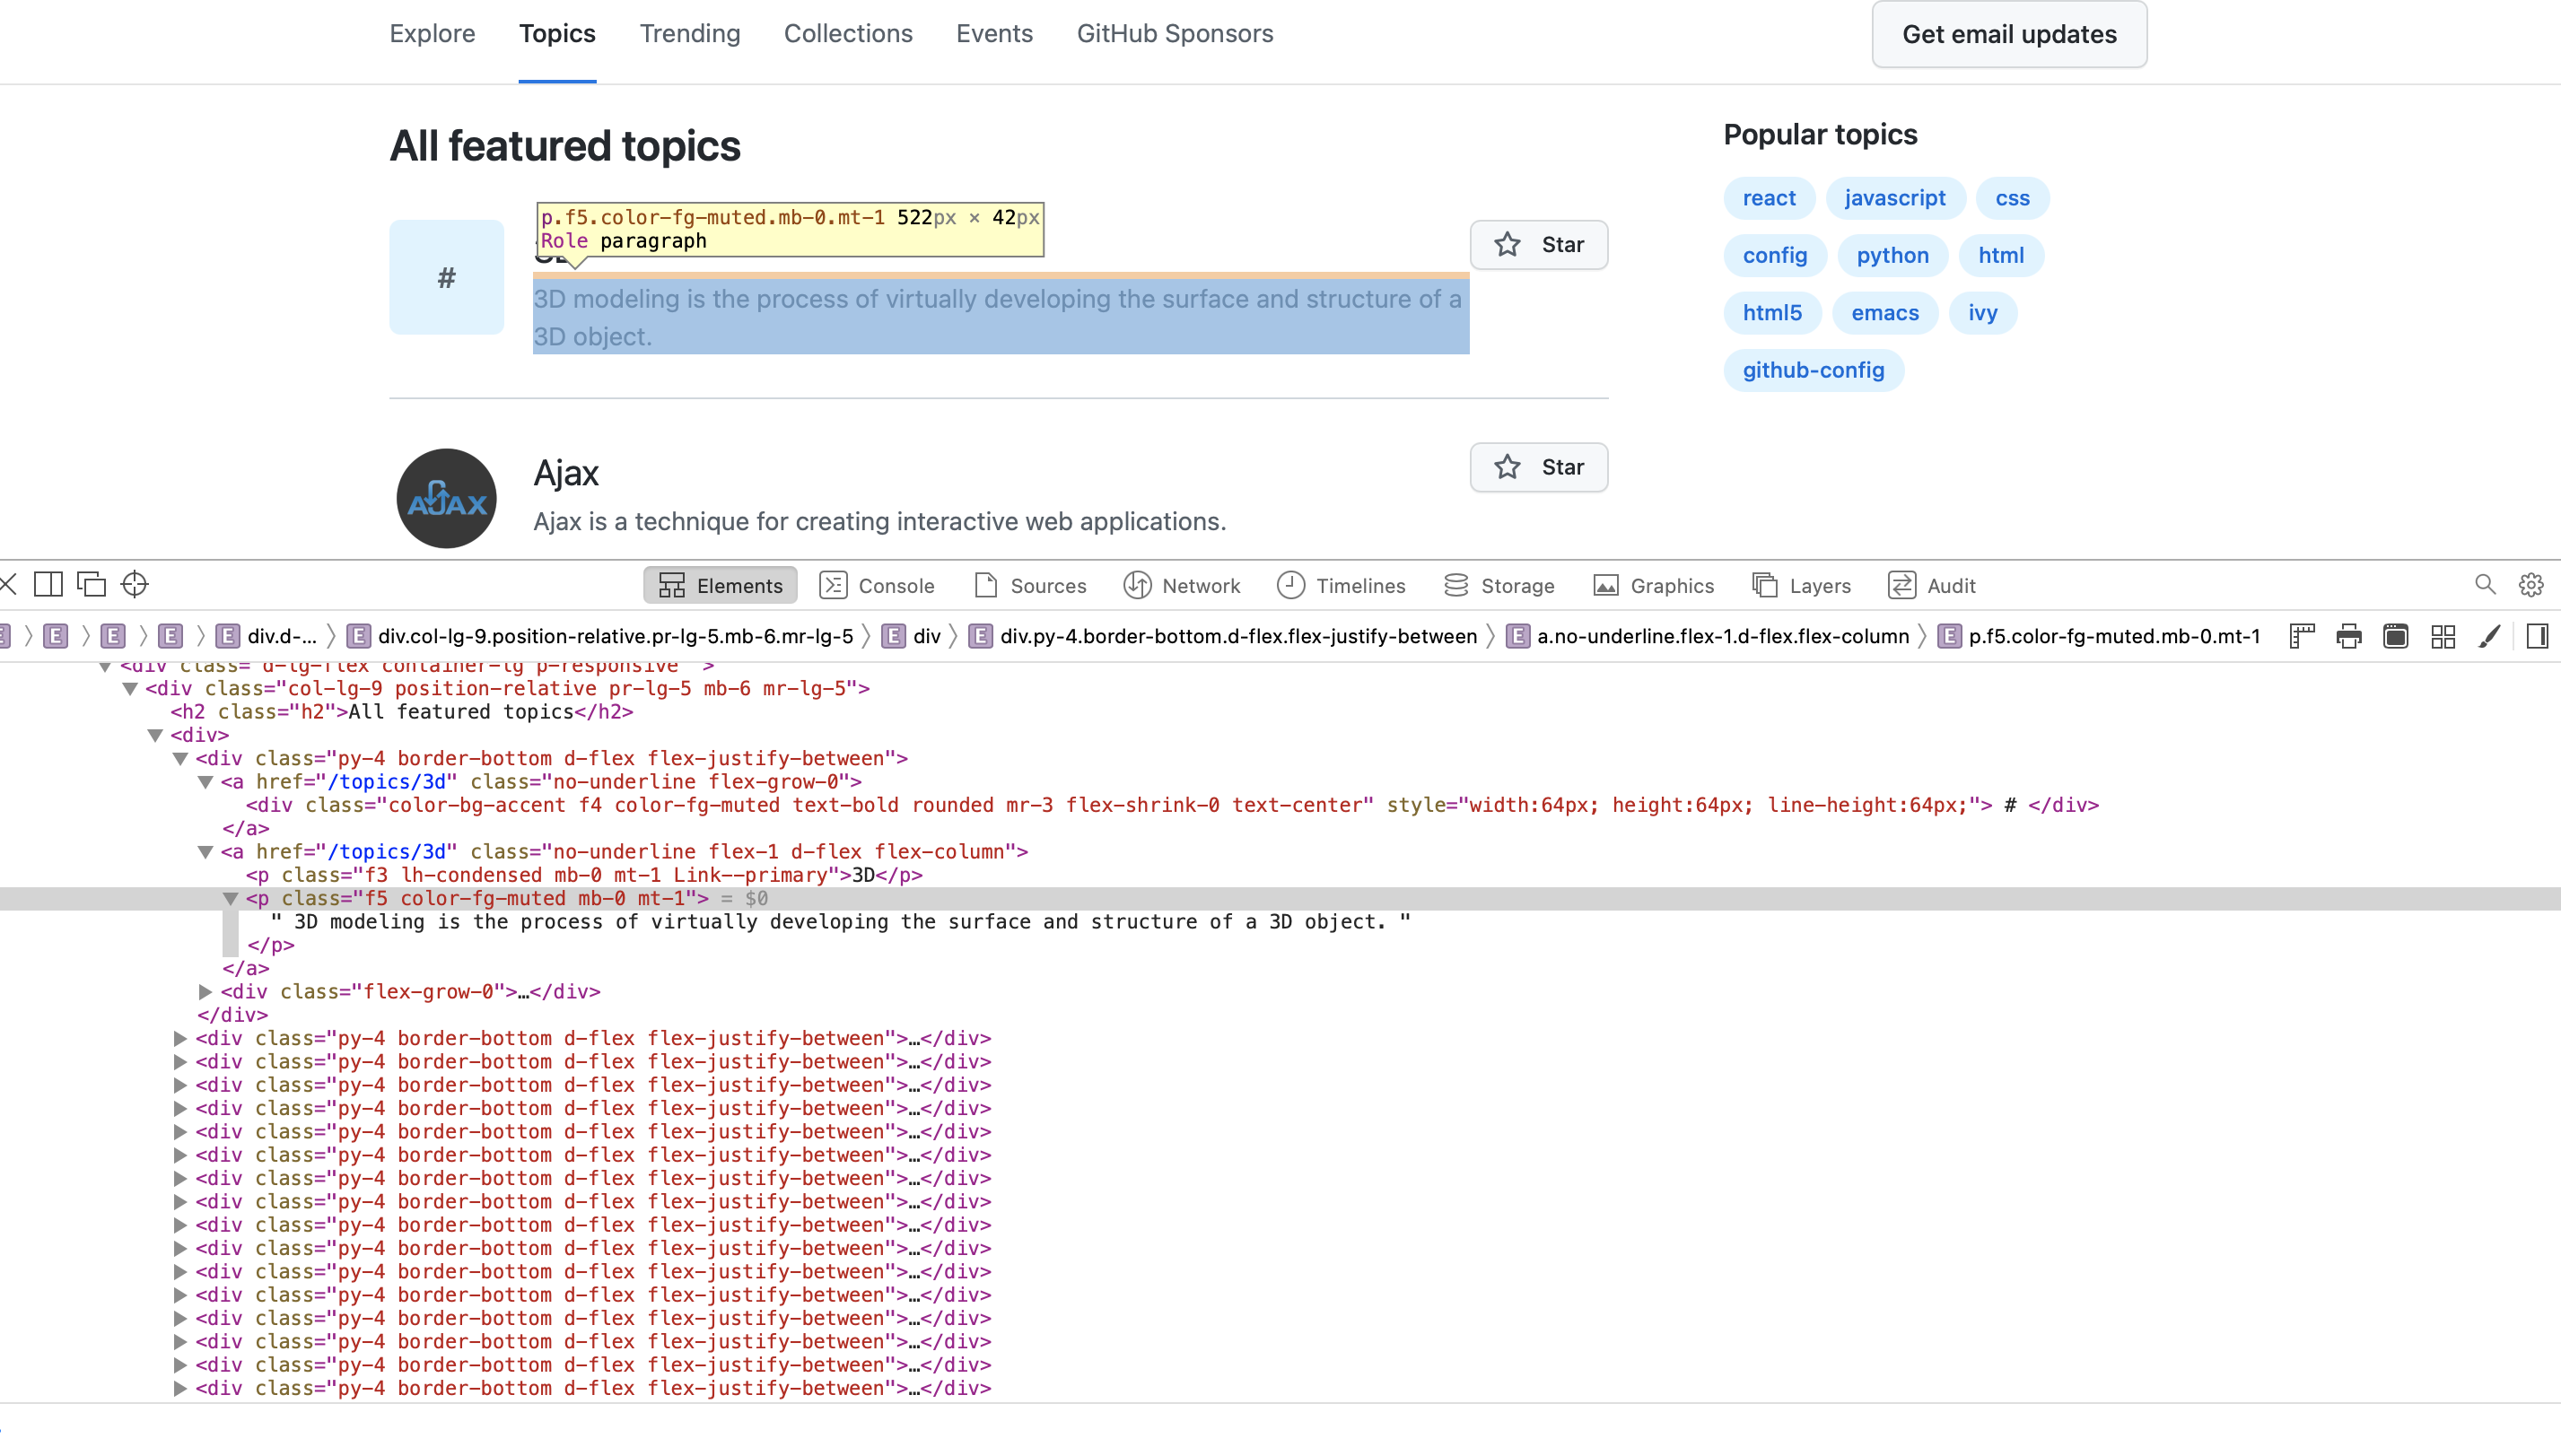

In [31]:
topic_description=get_topic_descs(doc)
topic_description[:2]

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.']

### Create a function (et_topic_urls ) to get the url 

In [32]:
def get_topic_urls(doc):                              
    topic_url_tags=doc.find_all('a',{'class': 'no-underline flex-1 d-flex flex-column' }) 
    topic_urls=[]
    base_url="https://github.com"
    for tag in topic_url_tags:
        topic_urls.append(base_url+tag['href'])
    return topic_urls

In [34]:
topic_url=get_topic_urls(doc)
topic_url[:3]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm']

## We got the title, description and urls of topic lets Putting this all together into a single function


In [35]:
!pip install pandas --upgrad 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [36]:
import pandas as pd

In [37]:
import pandas as pd
def scrape_topics():
    topic_url='https://github.com/topics'
    response= requests.get(topic_url)
    if response.status_code!=200:
        raise Exception('failed to load page{}'.format(topic_url))
    topic_dict= {
        'title':get_topic_titles(doc),
        'descriptions':get_topic_descs(doc),
        'urls':get_topic_urls(doc)
    }  
    return pd.DataFrame(topic_dict)
    topic_dataframe.to_csv('scrape_topics.csv', index= None)


In [43]:
scrape_topics()[:3]

,title,descriptions,urls
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm


### Get the top 30 repository from a Topic page

Steps to extract repositories:
- Download the page
- Check successful response
- parse using Beautiful soup
- using `def get_repository_info(h3_tag,star_tag)`, to return all the required infomation about a repository.
- Using `def get_topic_repository(topic_doc)`, to get the h3 tags containing repo title, repo URL and username

In [39]:
def get_topic_page(topic_url):
    # Download the page
    topic_url
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

In [40]:
topic_doc=get_topic_page('https://github.com/topics/3d')
#topic_doc

The H3 tag, will help in getting the name of the sub-topic of a particular topic (for eg: mr.doop in the topic 3D).

In [41]:
def get_repo_info(h3_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  'https://github.com' + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

def parse_star_count(stars):
    stars=stars.strip()
    if stars[-1]=='k':
        return int(float(stars[:-1])*1000)
    return(int(stars))



In [42]:
def get_topic_repos(topic_doc):
    # Get the h1 tags containing repo title, repo URL and username
    repo_tags = topic_doc.find_all('article',{'class':'border rounded color-shadow-small color-bg-subtle my-4'})


    # Get star tags
    star_tags=topic_doc.find_all('span',{'id':'repo-stars-counter-star'})
    
    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)


In [44]:
get_topic_repos(topic_doc)[:3]

,username,repo_name,stars,repo_url
0,,mrdoob,82200,https://github.com/mrdoob
1,libgdx,libgdx,20000,https://github.com/libgdx/libgdx
2,pmndrs,react-three-fiber,18000,https://github.com/pmndrs/react-three-fiber


In [45]:
import os
def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)

## Putting all together(scrape_topics_repos)
- we have a function to get the list of topics
- we have a function to create a CSV file for scraped repositorymfrom a topics page
- lets create a function to put them together.

In [46]:
import os
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['urls'], 'data/{}.csv'.format(row['title']))

In [47]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
The file data/3D.csv already exists. Skipping...
Scraping top repositories for "Ajax"
The file data/Ajax.csv already exists. Skipping...
Scraping top repositories for "Algorithm"
The file data/Algorithm.csv already exists. Skipping...
Scraping top repositories for "Amp"
The file data/Amp.csv already exists. Skipping...
Scraping top repositories for "Android"
The file data/Android.csv already exists. Skipping...
Scraping top repositories for "Angular"
The file data/Angular.csv already exists. Skipping...
Scraping top repositories for "Ansible"
The file data/Ansible.csv already exists. Skipping...
Scraping top repositories for "API"
The file data/API.csv already exists. Skipping...
Scraping top repositories for "Arduino"
The file data/Arduino.csv already exists. Skipping...
Scraping top repositories for "ASP.NET"
The file data/ASP.NET.csv already exists. Skipping...
Scraping top repositories for "Atom"
The file data/Atom.csv alre

###  Data stored in data folders are 
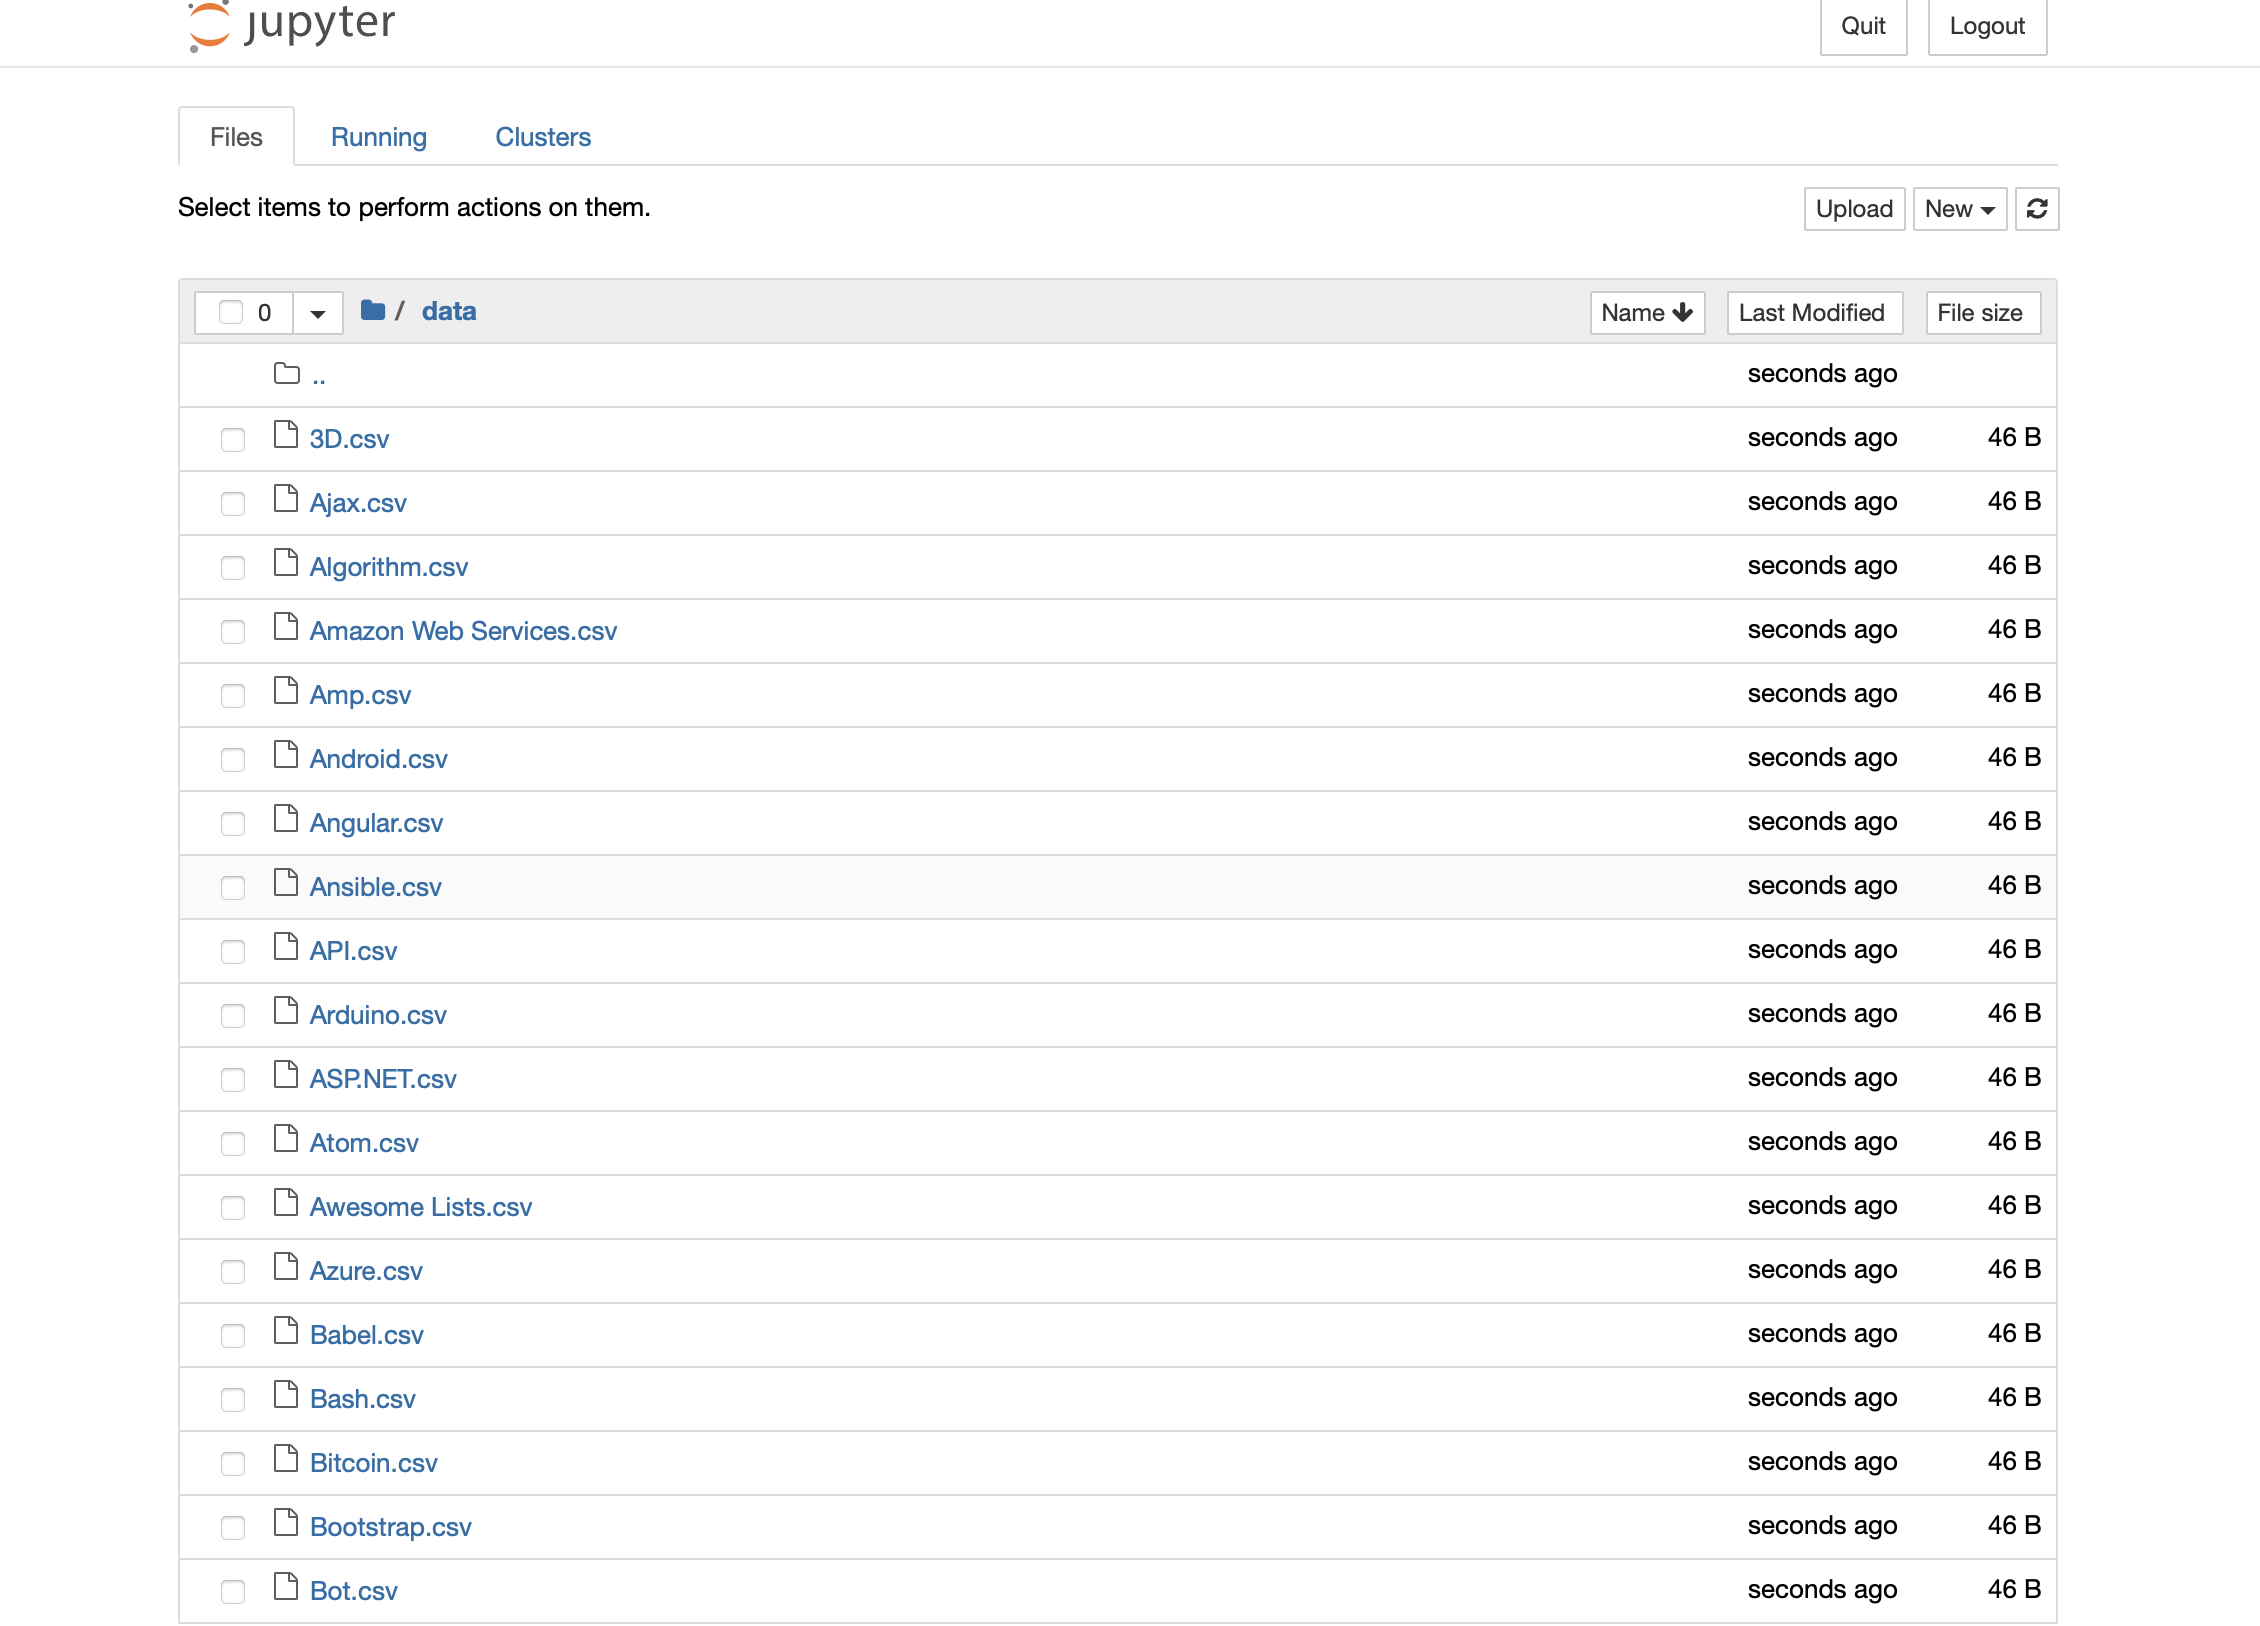







### Data store in csv file 

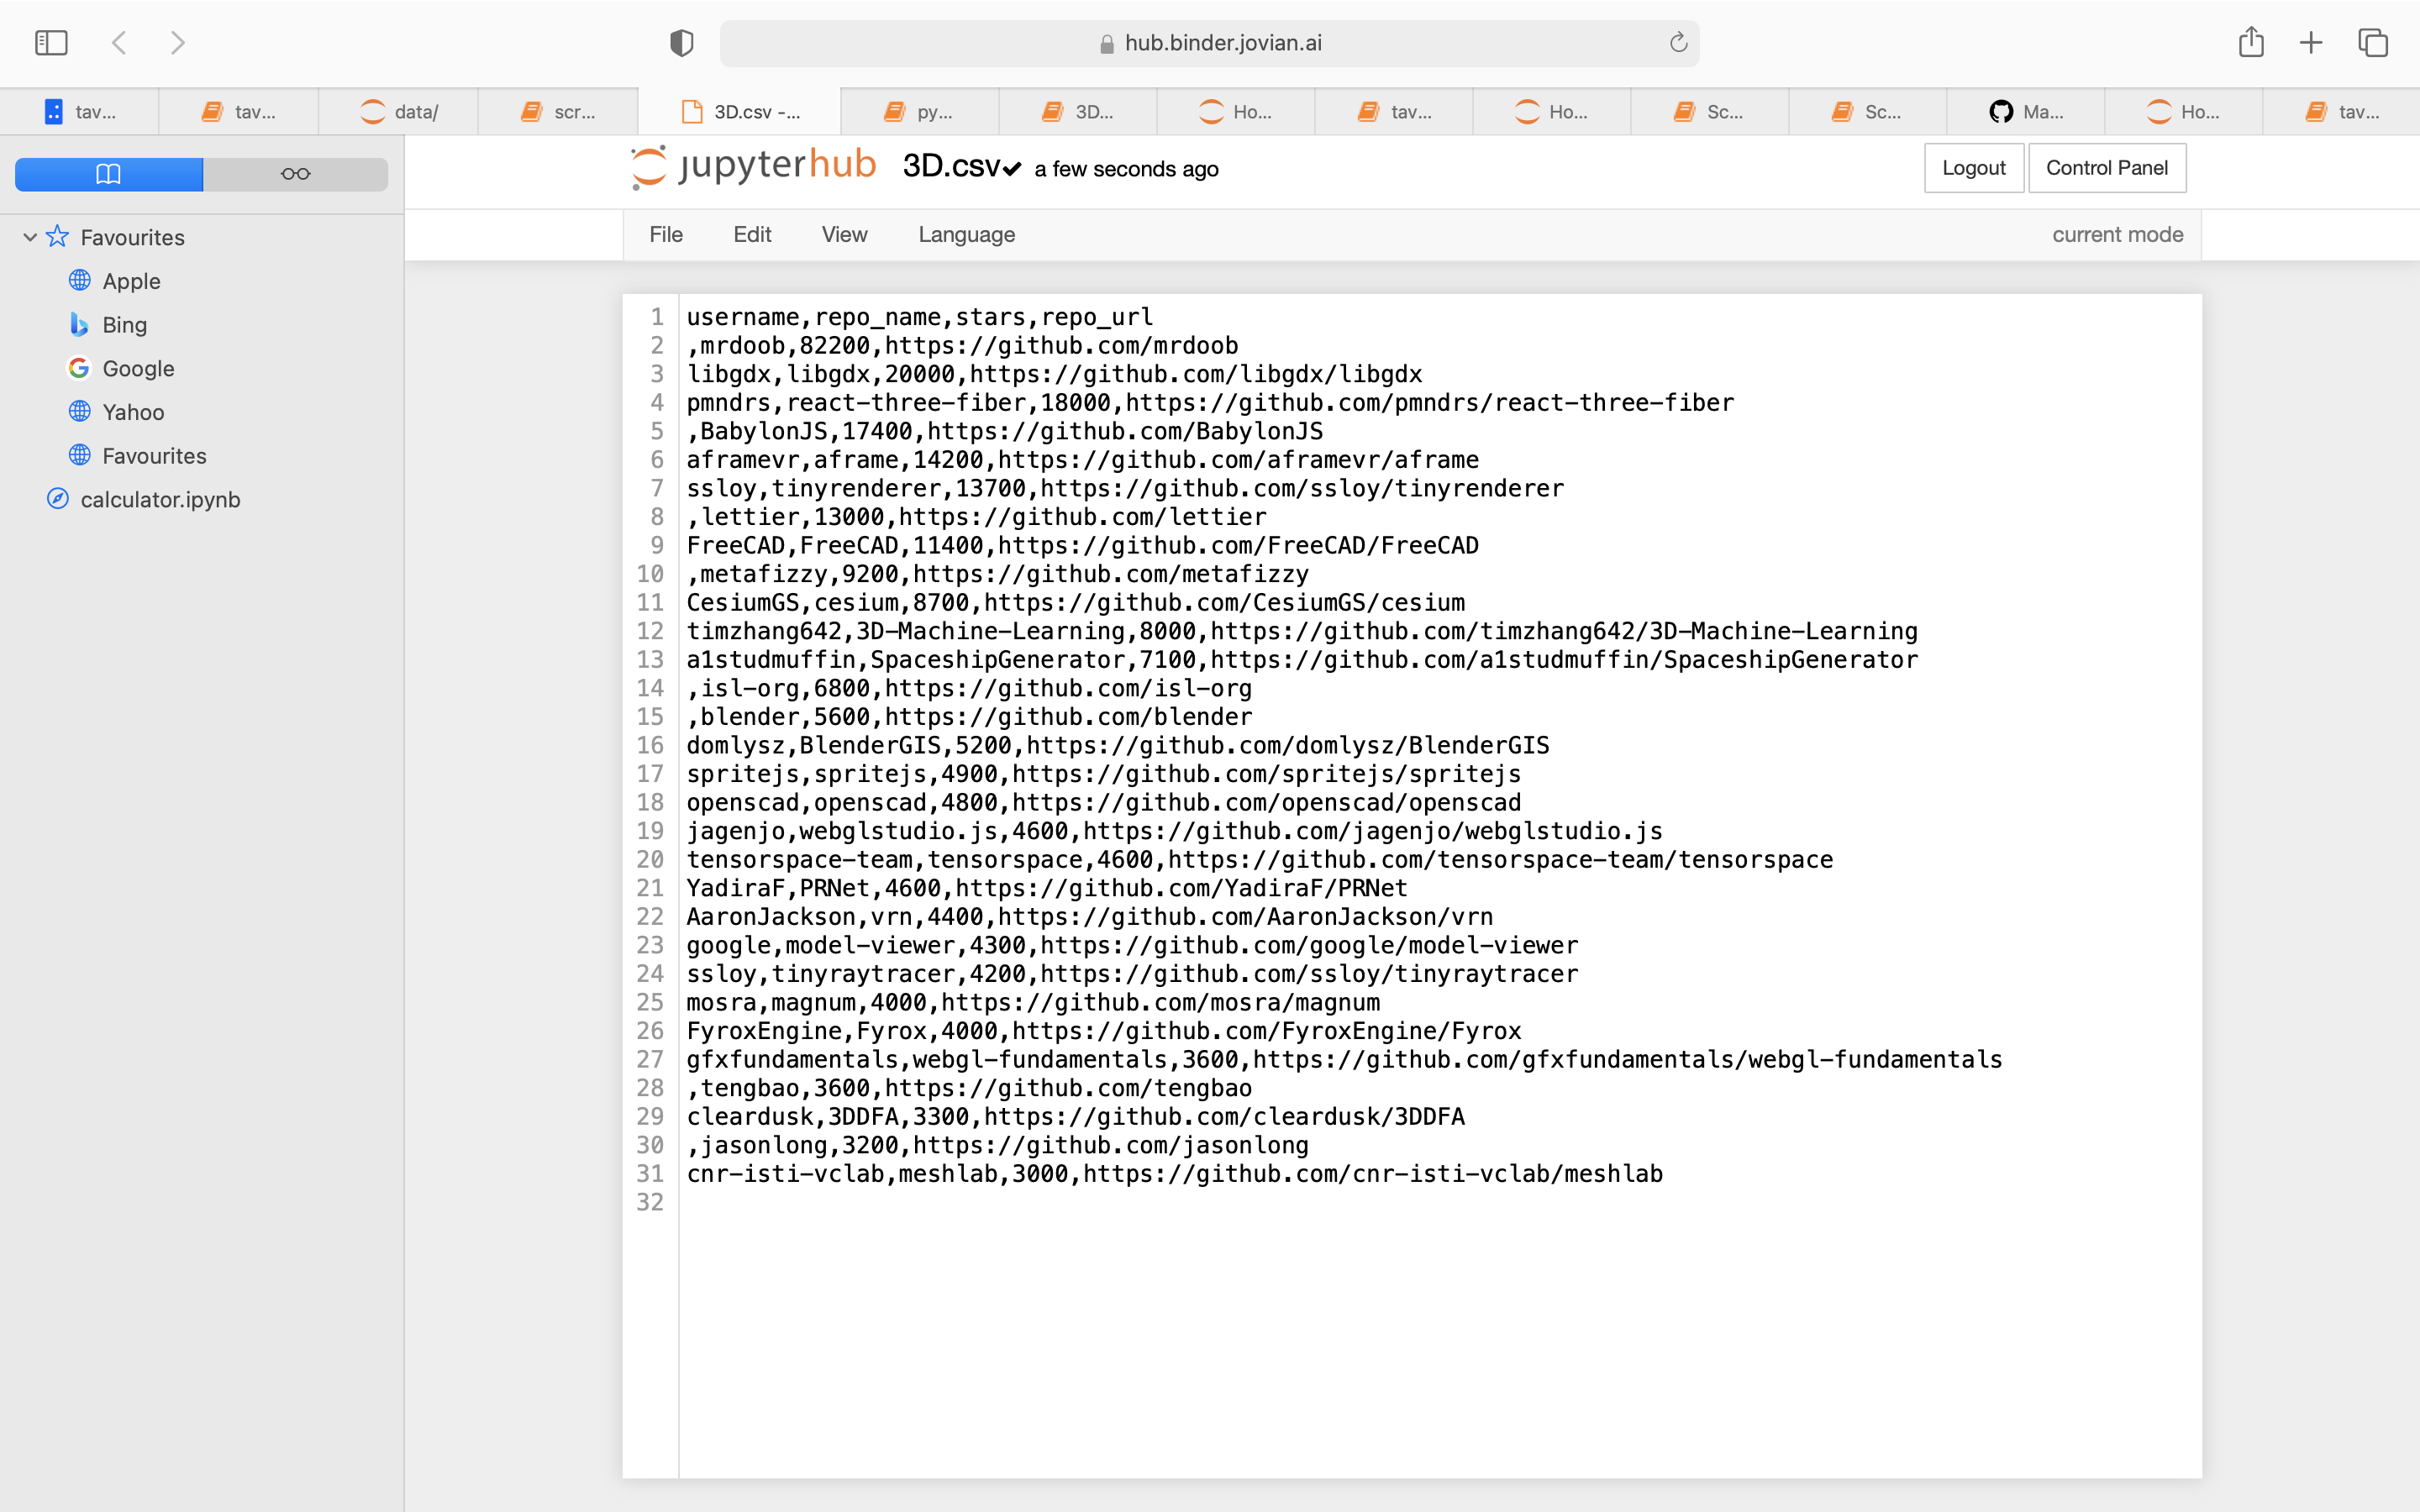

# summary

#### What we have done so far was

- Install and import libraries

- Download and Parse the Best seller HTML page source code using resquest and Beautifulsoup to get item categories topics URL.

- Each obtained item topic obtained using corresponding URL
Extract information from each page

- Combine the extracted information Extract information from each pages data in a Python Dictionaries

- Save the information data to CSV file Using Pandas library


